In [ ]:
#Sevgi YZC Nlp mii çalışması 

In [73]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv("/Users/sevgiyazici/amazon_reviews.csv" , sep=",")

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


## Normalizing Case Folding 

In [4]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

In [5]:
df['reviewText']

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [6]:
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

## Punctuations 

In [7]:
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

## Numbers 

In [8]:
df['reviewText'] = df['reviewText'].str.replace(r'\d','', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

## Stop Words ;(çeşitli bağlaçlar zamirler )

In [10]:
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sevgiyazici/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
sw_t = stopwords.words('turkish')
sw_t

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [14]:
df['reviewText'] =df['reviewText'].astype(str).apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

## Rare Words


In [15]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [16]:
temp_df = pd.Series(' '.join(df['reviewText'].astype(str)).split()).value_counts()
temp_df 

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [17]:
drops = temp_df[temp_df <= 1]
drops

conclusionmy       1
mbsbuy             1
flimsier           1
disappointedtry    1
priceokay          1
                  ..
sharper            1
cheapos            1
gate               1
measuring          1
stealwould         1
Name: count, Length: 5612, dtype: int64

In [18]:
drops = temp_df[temp_df <= 2]
drops

compelled     2
contract      2
vehicle       2
soaked        2
honored       2
             ..
sharper       1
cheapos       1
gate          1
measuring     1
stealwould    1
Name: count, Length: 6652, dtype: int64

In [19]:
df['reviewText'] = df['reviewText'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [20]:
df['reviewText'] 

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card weeks fa...
Name: reviewText, Length: 4915, dtype: object

## Tokenization 

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sevgiyazici/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from textblob import TextBlob
df['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

## Lemmatizasyon (Kelimeleri köklerine ayırma)

In [23]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sevgiyazici/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
from textblob import Word
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card week far ...
Name: reviewText, Length: 4915, dtype: object

## TEXT VISUALİZATİON

In [ ]:
# Calculation of Term Frequencies 
# Terim Frekanslarının hesaplanması 

In [31]:
tf = df['reviewText'].astype(str).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf

/var/folders/2v/b_0slg4d2zbgn1sm5ykpp20h0000gn/T/ipykernel_49498/959725776.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df['reviewText'].astype(str).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
/var/folders/2v/b_0slg4d2zbgn1sm5ykpp20h0000gn/T/ipykernel_49498/959725776.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = df['reviewText'].astype(str).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
/var/folders/2v/b_0slg4d2zbgn1sm5ykpp20h0000gn/T/ipykernel_49498/959725776.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df['reviewText'].astype(str).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
/var/fold

,words,tf
0,issue,609.0
1,purchased,344.0
2,device,584.0
3,worked,460.0
4,advertised,111.0
...,...,...
2737,patch,5.0
2738,mbswrite,3.0
2739,crippled,3.0
2740,ntsf,6.0


In [32]:
tf.sort_values("tf", ascending =False )

,words,tf
27,card,5537.0
14,work,2044.0
7,phone,1909.0
39,gb,1756.0
95,great,1445.0
...,...,...
903,international,3.0
895,fancy,3.0
886,shock,3.0
2741,pureview,3.0


In [ ]:
#kelimelerin frekanslarını çıkardık 

In [ ]:
#Bar PLOT

In [33]:
tf

,words,tf
0,issue,609.0
1,purchased,344.0
2,device,584.0
3,worked,460.0
4,advertised,111.0
...,...,...
2737,patch,5.0
2738,mbswrite,3.0
2739,crippled,3.0
2740,ntsf,6.0


In [35]:
tf[tf["tf"] > 500]  #en yaygın geçen keywordleri getirdik 

,words,tf
0,issue,609.0
2,device,584.0
7,phone,1909.0
8,memory,1378.0
14,work,2044.0
26,note,514.0
27,card,5537.0
33,well,677.0
36,one,1120.0
39,gb,1756.0


<Axes: xlabel='words'>

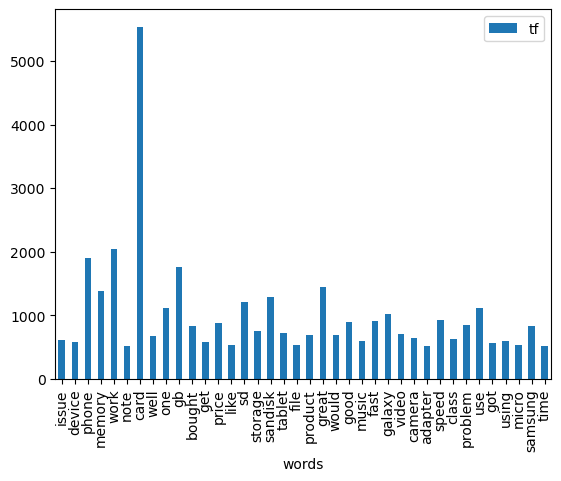

In [38]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")


In [43]:
tf[tf["tf"] < 100] 

,words,tf
10,download,56.0
12,stuff,99.0
13,brainer,9.0
16,higher,39.0
19,made,97.0
...,...,...
2737,patch,5.0
2738,mbswrite,3.0
2739,crippled,3.0
2740,ntsf,6.0


## WORD CLOUD

In [57]:
text = " ".join(i for i in df.reviewText)
text

'issue purchased device worked advertised never much phone memory since download lot stuff brainer work expected higher capacity think made bit earlier version paint look clean think worked gb card went south one held pretty well since note update ive month zero issue since transferred note note card reliable bought retail packaging arrived legit envelope version like picture show arrived quickly bought retail packaging htc one lg optimus card working order probably best price youll get nice sd card mini storage doesnt anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long reputation speaks phone never skip beat file transfer speedy corruption issue memory issue would expect sandisk brand great card precious file slightly cheaper piece crap lose everything spending extra couple buck trusted product go good hard believe affordable digital become gb device one quarter postage stamp would le generation picked portable music didnt

In [81]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

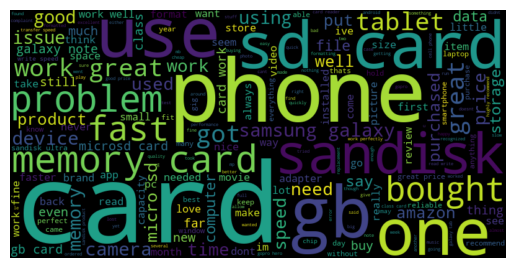

In [82]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()